In [9]:
import numpy as np
import pywt
import os
import cv2
from PIL import Image
from scipy.fftpack import dct
from scipy.fftpack import idct
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [10]:
def apply_dct(image_array):
    size = image_array[0].__len__()
    all_subdct = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subpixels = image_array[i:i+8, j:j+8]
            subdct = dct(dct(subpixels.T, norm="ortho").T, norm="ortho")
            all_subdct[i:i+8, j:j+8] = subdct

    return all_subdct

def process_coefficients(imArray, model, level):
    
    coeffs=pywt.wavedec2(data = imArray, wavelet = model, level = level)
    coeffs_H=list(coeffs) 
   
    return coeffs_H
def get_watermark(dct_watermarked_coeff, watermark_size):
    
    subwatermarks = []

    for x in range (0, dct_watermarked_coeff.__len__(), 8):
        for y in range (0, dct_watermarked_coeff.__len__(), 8):
            coeff_slice = dct_watermarked_coeff[x:x+8, y:y+8]
            subwatermarks.append(coeff_slice[5][5])
            
    watermark = np.array(subwatermarks).reshape(watermark_size, watermark_size)

    return watermark

def recover_watermark(image_array, model, level, wm_size):


    coeffs_watermarked_image = process_coefficients(image_array, model, level=level)
    dct_watermarked_coeff = apply_dct(coeffs_watermarked_image[0])
    
    watermark_array = get_watermark(dct_watermarked_coeff, wm_size)

    watermark_array =  np.uint8(watermark_array)

    #Save result
    img = Image.fromarray(watermark_array)
    img.save('./result/recovered_watermark2.png')

In [14]:
level = 2
wm_size = 64
#./result/image_with_watermark.png
img = Image.open('./result/image_with_watermark.png').resize((2048, 2048), 1)
img = img.convert('RGB')
image_array_H = np.array(img.getdata(), dtype=np.float).reshape((2048, 2048,3))

In [15]:
recover_watermark(image_array = image_array_H[:,:,2], model='haar', level = level,wm_size=wm_size)

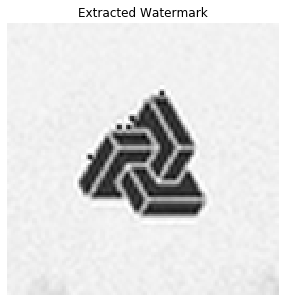

In [16]:
extracted_wm = Image.open('./result/recovered_watermark2.png').resize((128, 128), 1)
extracted_wm = extracted_wm.convert('RGB')
fig, axes = plt.subplots(1, 1, figsize=[10, 5])
axes.imshow(extracted_wm)
axes.set_title("Extracted Watermark")
axes.set_axis_off()